## 6.4 Machine Learning - Goals scored per minute

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = 'C:/Users/jeanclaude/ACHIEVEMENT 6'

In [53]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'goals_per_minute.csv'))
df2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'football_results.csv'))

### 2. Data cleaning

In [7]:
df.columns

Index(['Minute', 'Count'], dtype='object')

In [8]:
df.head(20)

,Minute,Count
0,1,193
1,2,333
2,3,319
3,4,341
4,5,382
5,6,346
6,7,389
7,8,418
8,9,347
9,10,428


In [9]:
df.shape

(122, 2)

##### Missing values

In [11]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Minute    0
Count     0
dtype: int64

##### Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(122,)

##### Extreme values checks

C:\Users\jeanclaude\AppData\Local\Temp\ipykernel_20312\2435416646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Count'], bins=25) # Shows extreme values


<Axes: xlabel='Count', ylabel='Density'>

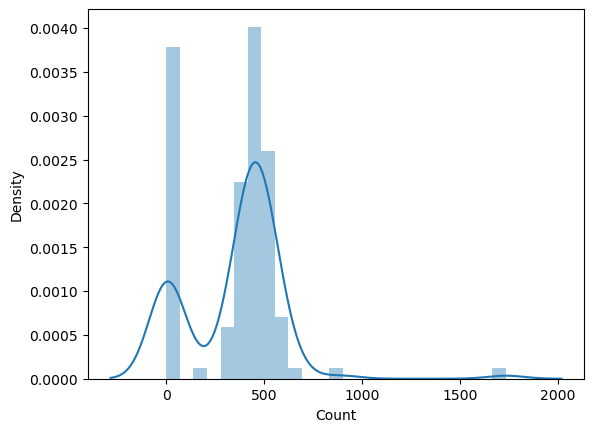

In [16]:
sns.distplot(df['Count'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
df['Count'].mean() # Check the mean

351.87704918032784

In [18]:
df['Count'].median() # Check the median

422.0

In [19]:
df['Count'].max() # Check the max

1735

### 3. Data prep for regression analysis 

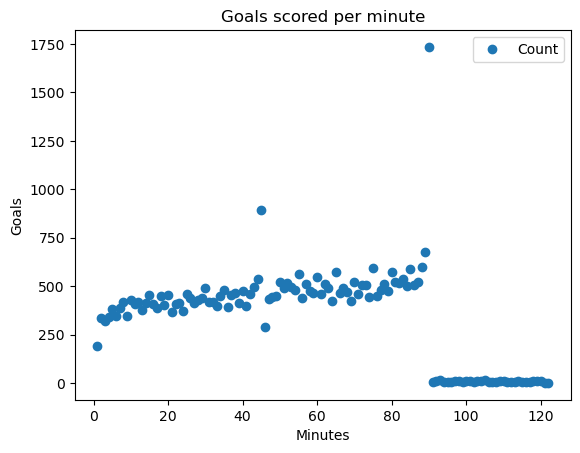

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Minute', y='Count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Goals scored per minute')  
plt.xlabel('Minutes')  
plt.ylabel('Goals')  
plt.show()

### Outliners are after 90 minutes, not all matches go beyond this point.
### Can see that closer to half time and full time around  (45 and 90 minutes) there is a spike in goals.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Minute'].values.reshape(-1,1)
y = df['Count'].values.reshape(-1,1)

In [23]:
X

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [24]:
y

array([[ 193],
       [ 333],
       [ 319],
       [ 341],
       [ 382],
       [ 346],
       [ 389],
       [ 418],
       [ 347],
       [ 428],
       [ 409],
       [ 416],
       [ 377],
       [ 411],
       [ 455],
       [ 410],
       [ 385],
       [ 451],
       [ 404],
       [ 454],
       [ 366],
       [ 408],
       [ 415],
       [ 372],
       [ 457],
       [ 439],
       [ 411],
       [ 430],
       [ 437],
       [ 491],
       [ 420],
       [ 419],
       [ 399],
       [ 450],
       [ 480],
       [ 394],
       [ 453],
       [ 462],
       [ 412],
       [ 476],
       [ 399],
       [ 459],
       [ 495],
       [ 537],
       [ 894],
       [ 288],
       [ 432],
       [ 445],
       [ 451],
       [ 522],
       [ 489],
       [ 517],
       [ 494],
       [ 482],
       [ 563],
       [ 441],
       [ 511],
       [ 473],
       [ 463],
       [ 548],
       [ 459],
       [ 511],
       [ 488],
       [ 423],
       [ 575],
       [ 466],
       [ 4

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

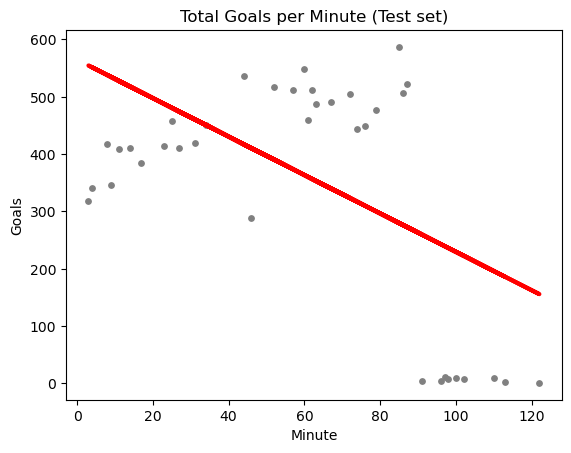

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Goals per Minute (Test set)')
plot_test.xlabel('Minute')
plot_test.ylabel('Goals')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.35103038]]
Mean squared error:  29670.57627741971
R2 score:  0.2620295643004594


In [35]:
y_predicted

array([[279.83780514],
       [236.27441026],
       [527.8140529 ],
       [323.40120002],
       [534.51611365],
       [410.52798977],
       [487.6016884 ],
       [537.86714402],
       [356.91150377],
       [259.73162289],
       [273.13574439],
       [196.06204576],
       [450.74035427],
       [340.15635189],
       [554.6222959 ],
       [299.94398739],
       [229.57234951],
       [480.89962765],
       [155.84968126],
       [460.79344539],
       [242.97647101],
       [222.87028876],
       [360.26253414],
       [507.70787065],
       [239.62544064],
       [186.00895464],
       [517.76096177],
       [309.99707851],
       [316.69913926],
       [474.1975669 ],
       [373.66665564],
       [353.56047339],
       [363.61356452],
       [417.23005052],
       [390.42180752],
       [551.27126552],
       [276.48677476]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,587,279.837805
1,8,236.274410
2,409,527.814053
3,505,323.401200
4,347,534.516114
5,288,410.527990
6,415,487.601688
7,418,537.867144
8,511,356.911504
9,4,259.731623


##### Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.35103038]]
Mean squared error:  55502.5234540093
R2 score:  0.202551165116713


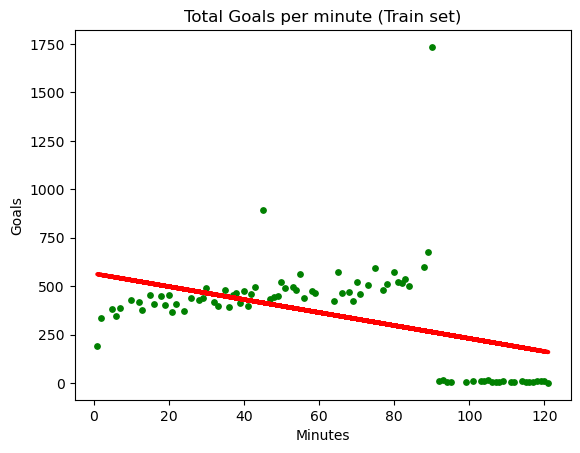

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Goals per minute (Train set)')
plot_test.xlabel('Minutes')
plot_test.ylabel('Goals')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [43]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Minute'] <=91] 

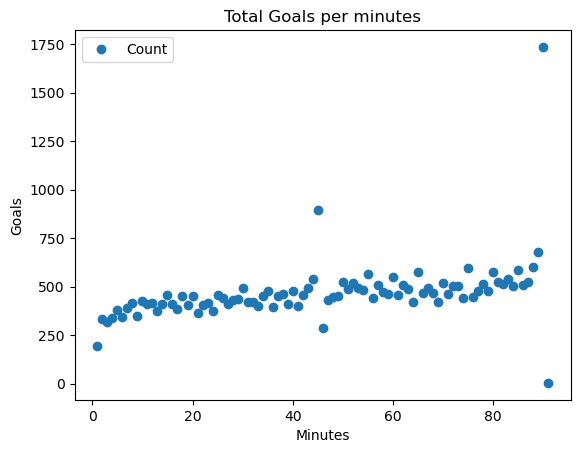

In [44]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Minute', y='Count', style='o')  
plt.title('Total Goals per minutes')  
plt.xlabel('Minutes')  
plt.ylabel('Goals')  
plt.show()

In [45]:
# Reshape again.

X_2 = df_test['Minute'].values.reshape(-1,1)
y_2 = df_test['Count'].values.reshape(-1,1)

In [46]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [47]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [48]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [49]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.28097424]]
Mean squared error:  17711.093787276415
R2 score:  -0.46972688395879025


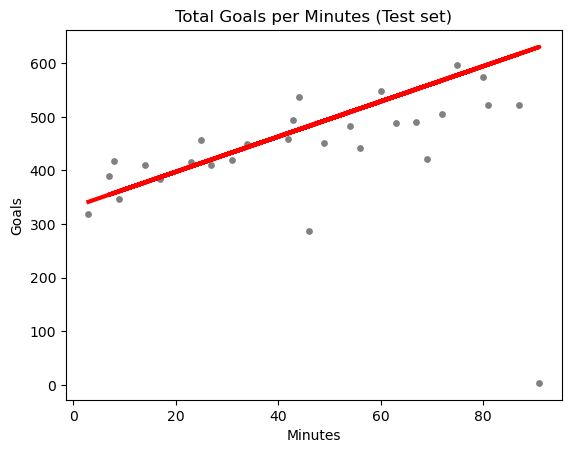

In [51]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Total Goals per Minutes (Test set)')
plot_test.xlabel('Minutes')
plot_test.ylabel('Goals')
plot_test.show()

### As a match progresses there is a higher chance of a goal being scored

In [52]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,319,341.615080
1,411,377.705797
2,482,508.944767
3,459,469.573076
4,523,617.216917
5,420,433.482359
6,288,482.696973
7,537,476.135024
8,548,528.630612
9,4,630.340814


In [55]:
#Daataframe for football results
df2.head()

,date,year,home_team,away_team,home_score,away_score,total_goals,result,home_result,away_result,tournament,country,neutral
0,1872-11-30,1872,Scotland,England,0,0,0,draw,DRAW,DRAW,Friendly,Scotland,False
1,1873-03-08,1873,England,Scotland,4,2,6,England,WIN,LOSE,Friendly,England,False
2,1874-03-07,1874,Scotland,England,2,1,3,Scotland,WIN,LOSE,Friendly,Scotland,False
3,1875-03-06,1875,England,Scotland,2,2,4,draw,DRAW,DRAW,Friendly,England,False
4,1876-03-04,1876,Scotland,England,3,0,3,Scotland,WIN,LOSE,Friendly,Scotland,False
